In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# load the Dataset
data=pd.read_csv('slr_dataset.csv')
data

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [26]:
data.shape
#df.info()

(244, 2)

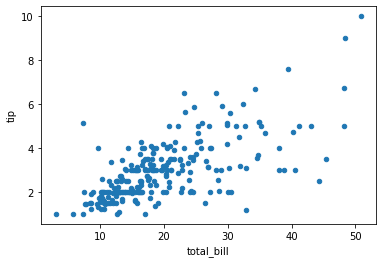

In [27]:
#visualisation before performing any action
data.plot(kind="scatter",x='total_bill',y='tip')
plt.show()

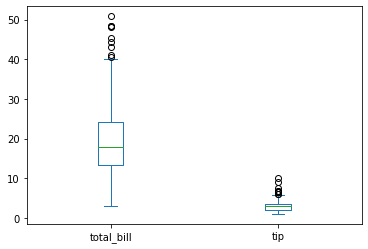

In [28]:
data.plot(kind="box")
plt.show()

In [29]:
from sklearn import linear_model
data.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [30]:
#change to dataframe varibles
totalbill=pd.DataFrame(data['total_bill'])
tips=pd.DataFrame(data['tip'])

In [31]:
totalbill

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [32]:
lm=linear_model.LinearRegression()
model=lm.fit(totalbill,tips)

In [33]:
model.coef_

array([[0.10502452]])

In [34]:


model.intercept_

array([0.92026961])

In [35]:
#evaluate the model
model.score(totalbill,tips)

0.45661658635167657

In [36]:
tips_new=([[46]])
tip_pred=model.predict(tips_new)
tip_pred

array([[5.75139741]])

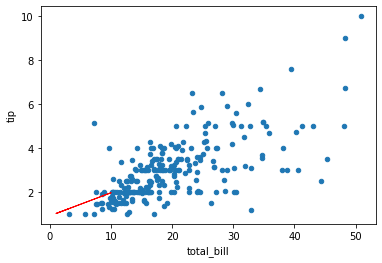

In [37]:
#visualize the predicted value
data.plot(kind="scatter", x='total_bill',y='tip')
#plotting the predicted regression line
plt.plot(tips,model.predict(tips),color='red',linewidth=1)
#plotting the predicted value
plt.show()

In [38]:
X=([5,8,3])
X=pd.DataFrame(X)
y=model.predict(X)
y=pd.DataFrame(y)
data=pd.concat([X,y],axis=1, keys=['tips_new_1','tip_pred_1'])
data

,tips_new_1,tip_pred_1
,0,0
0,5,1.445392
1,8,1.760466
2,3,1.235343


KeyError: 'total_bill'

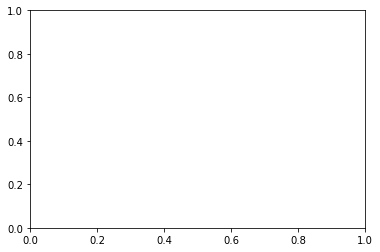

In [40]:
#visualise the data
data.plot(kind='scatter',x='total_bill',y='tip')
plt.show()

In [41]:
###########################################--New Program--#######################################################
#import libraries
#import or load dataset
#Define X and Y
#Split the data in training and test set
# Train the model on the training set
#predict the test set result
#evaluate the model 
#plot the result
#predict values

# import libraries

In [42]:
import pandas as np
import numpy as np
from sklearn.model_selection import train_test_split

# import the dataset

In [43]:
cdata=pd.read_excel('Folds5x2_pp.xlsx')
cdata

,Ambient Temparature,Vaccum,Ambient Pressure,Relative Humidity,Per hour Electricity
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# Defining the X and Y

In [45]:
X=cdata.drop(['Per hour Electricity'],axis=1).values
y=cdata['Per hour Electricity'].values

In [46]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [47]:
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

# split the dataset into training set and test set

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# train the model on the training set

In [49]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

# predict the result

In [50]:
y_pred=ml.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [51]:
#now we have got the predicted value of x_train in comparison of x_test.
#now lets check single first row values of x to predict y. and see how close the prediction from its realgiven value.
ml.predict([[14.96,41.76,1024.07,73.17]])
#as you can see the actual value is 463.26 and predict value is 467.35. which is close enough to actual.

array([467.34820092])

# Evaluate the Model

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#after getting r2_score which is 93% is good enough to say the model for prediction is good.

0.9304112159477682

# Plot the results

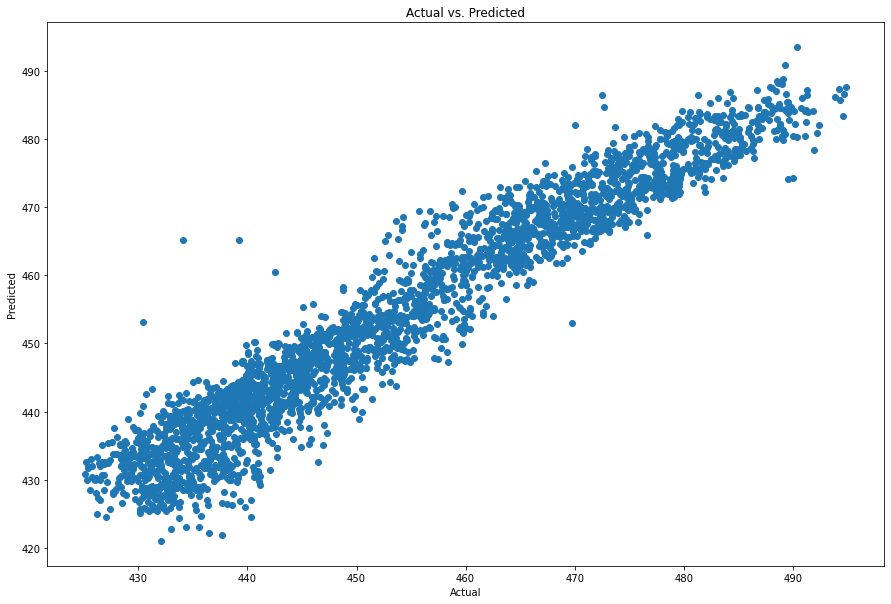

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()
#in graph we can see that actual and predicted are very close enough, only few exception or can say outliers are 
#are different.

# show the predicted values

In [54]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]
#showing the first 20 results along with predicted value and the difference between actual and predicted

,Actual Value,Predicted Value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396


In [55]:
#################################################--New Program--#################################################
# Import the necessary lib.
# Load the data into DF
# Identify the X (feature) and Y (outcome/response) variables in the DF 
# Splitting the data into training and validation data
# Model fitting
# Model Diagnostics ###
# Model Performance


# import the necessary lib

In [56]:
import pandas as pd
import numpy as np

In [57]:
data=pd.read_csv('HomeProducts_raw_data.csv')
df=pd.DataFrame(data=data)
df

,S.I,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0
4,5,61.00,180.0
5,6,55.00,300.0
6,7,70.00,260.0
7,8,68.00,235.0
8,9,82.80,425.0
9,10,59.00,240.0


In [58]:
import statsmodels.api as sm

In [59]:
X=sm.add_constant(df['Advertisement']).values
y=df['Sales']

/home/jack/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
#train the model into dataset
model=sm.OLS(y,X).fit()

In [61]:
#model parameter , which is Constant and Slope.
model.params

const    61.555355
x1        3.076177
dtype: float64

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     8.893
Date:                Fri, 05 Aug 2022   Prob (F-statistic):            0.00449
Time:                        09:44:38   Log-Likelihood:                -283.20
No. Observations:                  50   AIC:                             570.4
Df Residuals:                      48   BIC:                             574.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5554     66.702      0.923      0.361     -72.558     195.669
x1             3.0762      1.032      2.982      0.004       1.002       5.150
==============================================================================
Omnibus:                        1.393   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.291
Skew:                           0.256   Prob(JB):                        0.524
Kurtosis:                       2.403   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#now to predict x value(X-Fitted value)
y_pred=model.predict(X)
y_pred

array([252.27835649, 296.35997918, 283.04013087, 246.12600162,
       249.20217906, 230.74511443, 276.887776  , 270.73542112,
       316.2628472 , 243.04982418, 239.97364674, 246.12600162,
       264.58306625, 316.87808269, 270.73542112, 176.3890591 ,
       304.57337294, 271.9658921 , 276.887776  , 243.04982418,
       255.35453393, 215.36422724, 273.81159856, 221.51658211,
       212.2880498 , 260.27641783, 215.36422724, 289.19248575,
       239.97364674, 267.65924368, 292.26866319, 246.12600162,
       230.74511443, 301.4971955 , 215.61032143, 233.82129187,
       270.73542112, 221.51658211, 227.66893699, 221.51658211,
       295.34484062, 260.89165332, 290.42295672, 290.73057447,
       287.65439703, 238.68165222, 270.73542112, 273.81159856,
       264.58306625, 248.58694357])

In [64]:
model.predict([[1,62.00]])

array([252.27835649])

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y,y_pred)
#here in r2score the model only explains 15.6% of the variance of y. Now, we will go for mean_squared_error

0.15631530754337553

In [66]:
mse=mean_squared_error(y,y_pred)
mse

4866.041177799038

In [67]:
#rmse means root mean squared error
np.sqrt(mse)
#rmse means the average error of the model makes in predicting the outcome.the smaller the value the better the model is.

69.75701525867515

# with train_test_split

In [68]:
data=pd.read_csv('HomeProducts_raw_data.csv')
df=pd.DataFrame(data=data)
df.head()

,S.I,Advertisement,Sales
0,1,62.00,270.0
1,2,76.33,200.0
2,3,72.00,240.0
3,4,60.00,250.0
4,5,61.00,180.0


In [69]:
X=sm.add_constant(df['Advertisement']).values
y=df['Sales']

/home/jack/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)

In [72]:
model=sm.OLS(y_train,x_train).fit()

In [73]:
model

In [74]:
model.params

const    26.216370
x1        3.640221
dtype: float64

In [75]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     8.925
Date:                Fri, 05 Aug 2022   Prob (F-statistic):            0.00491
Time:                        09:44:51   Log-Likelihood:                -228.52
No. Observations:                  40   AIC:                             461.0
Df Residuals:                      38   BIC:                             464.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2164     79.018      0.332      0.742    -133.747     186.180
x1             3.6402      1.219      2.987      0.005       1.173       6.107
==============================================================================
Omnibus:                        2.389   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.681
Skew:                           0.296   Prob(JB):                        0.432
Kurtosis:                       2.189   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
y_pred=model.predict(x_test)
y_pred

array([215.50783911, 273.75136802, 208.22739799, 226.42850078,
       277.39158858, 304.07440527, 208.22739799, 273.75136802,
       297.04877959, 277.39158858])

In [77]:
#Evaluate the metrics using metric performance with sklearn
from sklearn.metrics import r2_score,mean_squared_error

In [78]:
r2_score(y_test,y_pred)

-0.3168890782271627

In [79]:
np.sqrt(mean_squared_error(y_test,y_pred))

54.9492124977453

# predicting the single Observation

In [80]:
X_new=[1,62.00]
model.predict(X_new)

array([251.91004468])

# prediction interval

In [81]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [82]:
_,pred_y_low,pred_y_high=wls_prediction_std(model,X_new,alpha=0.05)

In [83]:
pred_y_low,pred_y_high

(array([97.78349798]), array([406.03659138]))

# normal p-p plot

In [84]:
import matplotlib.pyplot as plt

In [85]:
sales_residuals=model.resid

In [86]:
sales_residuals

16    -61.793794
24    -84.587177
7     -38.751368
45    -55.820270
18    -50.031809
3       5.370396
41     97.897338
30    -49.232912
15     77.894196
20   -135.550265
43    -47.412802
38     42.211720
44     66.227419
39    -15.507839
10     12.650838
49     52.458220
25    -11.374618
33     19.846426
36    -96.151368
2     -48.312250
27    -77.592691
34     56.481384
35    109.931279
8      97.373368
19    -16.989383
29   -120.111147
12    161.529073
5      73.571499
0      18.089955
28    122.650838
4     -68.269824
40     90.126868
13    121.645324
9      -0.989383
48    -26.470927
23    -95.507839
6     -21.031809
17      4.792544
11    -64.629604
31    -44.629604
dtype: float64

/home/jack/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x1152 with 0 Axes>

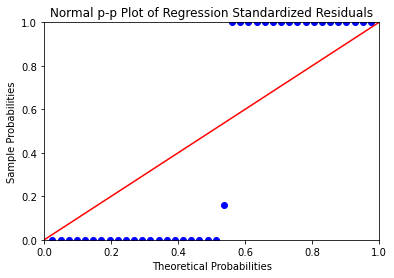

In [87]:
probplot=sm.ProbPlot(sales_residuals)
plt.figure(figsize=(8,16))
probplot.ppplot(line='45')
plt.title('Normal p-p Plot of Regression Standardized Residuals')
plt.show()

# test for constant variance

In [88]:
def standardize(vals):
    return (vals-vals.mean())/vals.std()

Text(0, 0.5, 'standardized Residuals')

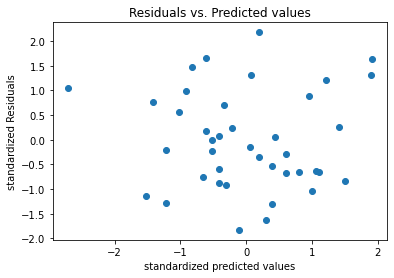

In [89]:
plt.scatter(standardize(model.fittedvalues),standardize(sales_residuals))
plt.title("Residuals vs. Predicted values")
plt.xlabel('standardized predicted values')
plt.ylabel('standardized Residuals')

# Outliers Analysis

# z score

In [90]:
from scipy.stats import zscore

In [91]:
df['Z_scores_sales']= zscore(df['Sales'])

In [92]:
df.head()

,S.I,Advertisement,Sales,Z_scores_sales
0,1,62.00,270.0,0.155481
1,2,76.33,200.0,-0.766241
2,3,72.00,240.0,-0.239543
3,4,60.00,250.0,-0.107868
4,5,61.00,180.0,-1.029590


In [93]:
df[(df['Z_scores_sales']>3.0) | (df['Z_scores_sales']<-3.0)]

,S.I,Advertisement,Sales,Z_scores_sales


# Cook's Distance

Text(0, 0.5, 'Cooks Distance')

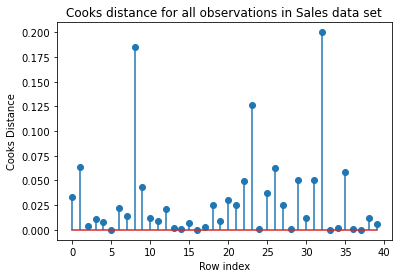

In [94]:
#sales_influence=model.get_influence()
#(c,p)=sales_influence.cooks_distance
#c is cook's Distance and p and corresponding p-values
#plt.stem(np.arange(len(c)),np.round(c,3),markerfmt='C0o')
#plt.title("Cook's distance for all observations in sales Dataset")
#plt.xlabel('Row Index')
#plt.ylabel('Cooks distance')
#look for > 1

sales_influence = model.get_influence()

(c, p) = sales_influence.cooks_distance

# c is cook's distance, p is corresponding p-values

plt.stem(np.arange(len(c)), np.round(c,3), markerfmt='C0o')

plt.title('Cooks distance for all observations in Sales data set')

plt.xlabel('Row index')

plt.ylabel('Cooks Distance')

# look for > 1

# Levarage Plot

In [95]:
from statsmodels.graphics.regressionplots import influence_plot

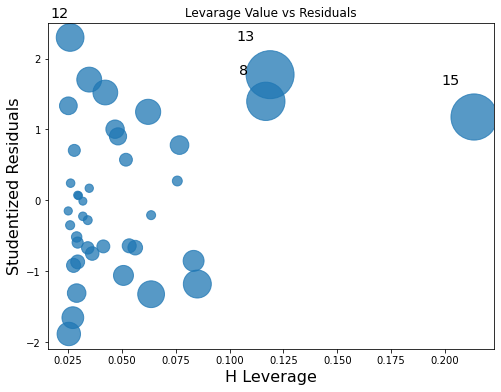

In [96]:
fig, ax=plt.subplots(figsize=(8,6))
influence_plot(model,ax=ax)
plt.title("Levarage Value vs Residuals")
plt.show()

In [97]:
from statsmodels.stats.outliers_influence import OLSInfluence as olsi

In [98]:
studentized_residual= olsi(model).resid_studentized

In [99]:
levarage_pts=olsi(model).hat_matrix_diag

In [100]:
high_resid=[i for i in studentized_residual if abs(i)>3]

In [101]:
high_resid

[]

In [102]:
levarage_pts

array([0.08328084, 0.08501176, 0.02897811, 0.03620766, 0.03411988,
       0.02943969, 0.02512524, 0.05617436, 0.21351021, 0.02532372,
       0.05337748, 0.05186598, 0.04817801, 0.06354714, 0.03481225,
       0.02787947, 0.02506318, 0.07571565, 0.02897811, 0.04136452,
       0.05071203, 0.07673944, 0.04228768, 0.11682312, 0.03186311,
       0.0271958 , 0.0259392 , 0.04681397, 0.02616999, 0.03481225,
       0.02754198, 0.0621624 , 0.11879879, 0.03186311, 0.0259392 ,
       0.06354714, 0.03411988, 0.02983824, 0.02943969, 0.02943969])

In [103]:
high_lev=[i for i in levarage_pts if abs(i) > (3/len(X))]

In [104]:
high_lev

[0.08328084078833484,
 0.08501176323129322,
 0.21351020531467985,
 0.06354714207589302,
 0.07571564513616161,
 0.07673943647522485,
 0.11682312114731624,
 0.06216240412152635,
 0.11879879102939966,
 0.06354714207589302]

In [105]:
pos=[np.where(levarage_pts==x)[0][0] for x in high_lev]

In [106]:
pos

[0, 1, 8, 13, 17, 21, 23, 31, 32, 13]

In [107]:
for n in pos:
    print(df.iloc[n])

S.I                 1.000000
Advertisement      62.000000
Sales             270.000000
Z_scores_sales      0.155481
Name: 0, dtype: float64
S.I                 2.000000
Advertisement      76.330000
Sales             200.000000
Z_scores_sales     -0.766241
Name: 1, dtype: float64
S.I                 9.000000
Advertisement      82.800000
Sales             425.000000
Z_scores_sales      2.196439
Name: 8, dtype: float64
S.I                14.000000
Advertisement      83.000000
Sales             450.000000
Z_scores_sales      2.525625
Name: 13, dtype: float64
S.I                18.000000
Advertisement      68.400000
Sales             280.000000
Z_scores_sales      0.287156
Name: 17, dtype: float64
S.I                22.000000
Advertisement      50.000000
Sales             260.000000
Z_scores_sales      0.023807
Name: 21, dtype: float64
S.I                24.000000
Advertisement      52.000000
Sales             120.000000
Z_scores_sales     -1.819638
Name: 23, dtype: float64
S.I             

In [108]:
# so these are the points where influence is high

In [109]:
###########################################--New Program--#######################################################

In [110]:
# This is an MLR Program.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
data=pd.read_csv("Advertising.csv")
df=pd.DataFrame(data=data)
df.head()

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
#defining the X and y variable
import statsmodels.api as sm
X=sm.add_constant(df[["TV","Radio","Newspaper"]])
y=df['Sales']

/home/jack/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [113]:
X

,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4
...,...,...,...,...
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2


In [114]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [115]:
#fitting the model for training into dataset
model=sm.OLS(y,X).fit()
model.params

const        2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [116]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        09:45:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Train Test split

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=101)

In [118]:
model=sm.OLS(y_train,x_train).fit()

In [119]:
model.params

const        3.688865
TV           0.045207
Radio        0.173379
Newspaper   -0.012757
dtype: float64

In [120]:
pred_y=model.predict(x_test)
pred_y[0:30]

37     15.047752
109    19.828407
31     11.317100
89     16.284392
66      9.349934
119     7.055467
54     20.355168
74     17.434001
145    10.245987
142    18.929665
148    12.242087
112    14.271115
174    14.165230
55     20.480016
141    17.618635
149     9.919997
25     15.931801
34      8.163486
170     7.725678
39     20.124184
172     7.842971
153    17.835005
175    24.151624
61     22.206890
65      8.409075
50     12.817278
42     21.741208
129     7.913928
179    12.684381
2      11.540482
dtype: float64

# perform Evaluation

In [121]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
MAE=mean_absolute_error(y_test,pred_y)
MAE

1.3534128042740394

In [122]:
MAPE=mean_absolute_percentage_error(y_test,pred_y)
MAPE

0.14778277686200206

In [123]:
r2_score(y_test,pred_y)

0.8903806044566008

# Polynomial Regression

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
X=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [126]:
#In Polynomial Regression, the manipulate with coefficient of X values. like below
# x1, x2, x3,
# x1^2, x1.x2, x1.x3
# x2^2, x2.x3
# x3^2
# It is also called feature engineering. Because these are features(manupulation with coefficients) of the model
#affect harder and make it closer to accuracy with less residuals and outliers.
poly_instance=PolynomialFeatures(degree=2,include_bias=True)

In [127]:
poly_instance.fit(X)

PolynomialFeatures()

In [128]:
poly_features=poly_instance.transform(X)
#transform will generate the actual Columns with Data

In [129]:
poly_features

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [130]:
X.shape

(200, 3)

In [131]:
poly_features.shape

(200, 10)

In [132]:
X=poly_features

In [133]:
X

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [134]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [135]:
model=sm.OLS(y,X).fit() # now X is poly_features

In [136]:
model.params

const    5.084782
x1       0.051653
x2       0.021074
x3       0.006884
x4      -0.000110
x5       0.001105
x6      -0.000046
x7       0.000112
x8       0.000083
x9       0.000012
dtype: float64

In [137]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1543.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.72e-172
Time:                        09:45:36   Log-Likelihood:                -183.14
No. Observations:                 200   AIC:                             386.3
Df Residuals:                     190   BIC:                             419.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0848      0.239     21.279      0.000       4.613       5.556
x1             0.0517      0.002     22.997      0.000       0.047       0.056
x2             0.0211      0.013      1.675      0.096      -0.004       0.046
x3             0.0069      0.008      0.863      0.389      -0.009       0.023
x4            -0.0001   6.95e-06    -15.778      0.000      -0.000    -9.6e-05
x5             0.0011   3.81e-05     29.043      0.000       0.001       0.001
x6         -4.552e-05   2.38e-05     -1.915      0.057   -9.24e-05    1.37e-06
x7             0.0001      0.000      0.458      0.647      -0.000       0.001
x8          8.266e-05      0.000      0.486      0.628      -0.000       0.000
x9          1.191e-05   7.34e-05      0.162      0.871      -0.000       0.000
==============================================================================
Omnibus:                      145.912   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2613.928
Skew:                          -2.477   Prob(JB):                         0.00
Kurtosis:                      20.004   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# using Train test Split

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.7,random_state=101)

In [140]:
model=sm.OLS(y_train,x_train).fit()

In [141]:
model.params

const    5.039015
x1       0.048104
x2       0.035191
x3       0.018703
x4      -0.000100
x5       0.001092
x6      -0.000019
x7       0.000147
x8      -0.000223
x9      -0.000115
dtype: float64

In [142]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     734.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           6.84e-50
Time:                        09:45:40   Log-Likelihood:                -32.812
No. Observations:                  60   AIC:                             85.62
Df Residuals:                      50   BIC:                             106.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0390      0.311     16.192      0.000       4.414       5.664
x1             0.0481      0.003     15.659      0.000       0.042       0.054
x2             0.0352      0.018      2.002      0.051      -0.000       0.070
x3             0.0187      0.013      1.410      0.165      -0.008       0.045
x4            -0.0001   9.61e-06    -10.438      0.000      -0.000    -8.1e-05
x5             0.0011   5.81e-05     18.779      0.000       0.001       0.001
x6         -1.856e-05   3.78e-05     -0.491      0.626   -9.45e-05    5.74e-05
x7             0.0001      0.000      0.413      0.682      -0.001       0.001
x8            -0.0002      0.000     -0.748      0.458      -0.001       0.000
x9            -0.0001      0.000     -0.774      0.442      -0.000       0.000
==============================================================================
Omnibus:                        1.707   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.702
Skew:                          -0.358   Prob(JB):                        0.427
Kurtosis:                       2.590   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
pred_y=model.predict(x_test)
pred_y

array([14.24590089, 19.37423118, 12.31235465, 16.86384814,  8.28250204,
        7.14625738, 20.23606606, 17.52294145, 10.30319939, 20.19846687,
       10.14158496, 13.95263622, 11.88274425, 23.28755952, 19.39569949,
        9.45446555, 12.09082721,  9.03614438,  8.49510974, 21.78742491,
        7.34242483, 19.47656272, 27.4317453 , 24.60287089,  8.9348271 ,
       11.78841868, 20.49250998,  9.20294416, 12.62834654,  8.63502281,
        8.64270224, 20.23647296, 10.71480205,  6.93847852, 18.33993511,
        9.37223152, 10.32699157,  9.48095102,  7.78639596, 10.76693692,
       11.59399745, 10.52596971, 11.20096121,  7.57465846, 11.59545835,
       10.4159197 ,  6.75757343, 15.56115498, 13.34802469, 22.70956082,
       10.67708526, 13.16276313, 14.28849609, 11.79690147, 11.55825644,
        5.80214477, 25.334002  , 10.2964619 , 17.30245921, 15.76792054,
       15.39231442, 25.53924312,  8.40022535, 21.5249254 , 12.36486133,
       22.09604293, 15.75806665, 14.24970351, 15.98539507, 17.62

In [144]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [145]:
MAE=mean_absolute_error(y_test,pred_y)
MAE

0.4623270005579828

In [146]:
MAPE=mean_absolute_percentage_error(y_test,pred_y)
MAPE

0.06474496746039721

In [147]:
r2_score(y_test,pred_y)

0.9826354965926719

# Choosing the best Degree polynomial

In [148]:
data=pd.read_csv('Advertising.csv')
df=pd.DataFrame(data=data)

In [149]:
df

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,94.2,4.9,8.1,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,177.0,9.3,6.4,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,283.6,42.0,66.2,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
X=df.drop('Sales',axis=1).values
y=df['Sales']

In [151]:
#train_mape_lst=[]
#test_mape_lst=[]
#for i in range(1,10):
#    poly_instance=PolynomialFeatures(degree=i,include_bias=False)
#    
#    poly_features=poly_instance.fit_transform(X) #creating new features
#    
#    x_train,x_test,y_train,y_test=train_test_split(poly_features,y,train_size=0.7,random_state=101)
#    
#    model=sm.OLS(y_train,x_train).fit()
#    
#    train_pred=model.predict(x_train)
#   test_pred=model.predict(x_test)
#    
#    train_mape=mean_absolute_percentage_error(y_train,train_pred)
#    test_mape=mean_absolute_percentage_error(y_test,test_pred)
#   
#    train_mape_lst.append(train_mape)
#    test_mape_lst.append(test_mape)

train_mape_lst = []
test_mape_lst = []

for i in range(1, 10):
    
    poly_instance = PolynomialFeatures(degree=i, include_bias=False)
    
    poly_features = poly_instance.fit_transform(X) # creating new features
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, train_size=0.7, random_state=101)
       
    model = sm.OLS(y_train, X_train).fit()
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_lst.append(train_mape)
    test_mape_lst.append(test_mape)

ValueError: could not convert string to float: ' 52,946 '

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as model

In [153]:
data=pd.read_excel('Folds5x2_pp.xlsx')
data.head()

,Ambient Temparature,Vaccum,Ambient Pressure,Relative Humidity,Per hour Electricity
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [154]:
X=data.drop(['Per hour Electricity'],axis=1).values
y=data['Per hour Electricity']

In [155]:
X.shape

(9568, 4)

In [156]:
y.shape

(9568,)

In [157]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [162]:
y_pred=model.predict(x_test)

TypeError: predict() missing 1 required positional argument: 'X'

In [163]:
################################################################################################################

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [165]:
data=pd.read_csv('Advertising.csv')
data

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,94.2,4.9,8.1,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,177.0,9.3,6.4,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,283.6,42.0,66.2,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
X=data['Newspaper']
Y=data['Sales']

In [167]:
mean_x=np.mean(abs(X))
mean_y=np.mean(abs(Y))

In [168]:
n=len(X)

numer=0
denom=0

for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
    
b1=numer / denom
b0=mean_y - (b1*mean_x)

print(b1,b0)

0.054693098472273306 12.351407069278164


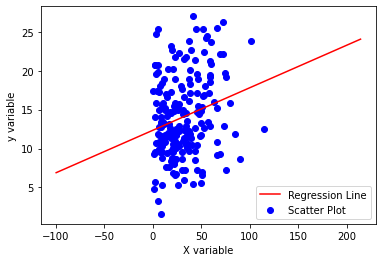

In [169]:
max_x= np.max(X)+100
min_x= np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,color='r',label='Regression Line')
plt.scatter(X,Y,c='b',label='Scatter Plot')

plt.xlabel('X variable')
plt.ylabel('y variable')
plt.legend()
plt.show()

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [171]:
data=pd.read_csv('Advertising.csv')
data

,TV,Radio,Newspaper,Sales,Unnamed: 4,TV^2,tv.radio,tv.news,radio^2,radio.news,news^2
0,230.1,37.8,69.2,22.1,NaN,"52,946","8,698","15,923","1,429","2,616","4,789"
1,44.5,39.3,45.1,10.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.2,45.9,69.3,9.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,151.5,41.3,58.5,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,180.8,10.8,58.4,12.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,94.2,4.9,8.1,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,177.0,9.3,6.4,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,283.6,42.0,66.2,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
X=data['Newspaper']
Y=data['Sales']

In [173]:
mean_x=np.mean(abs(X))
mean_y=np.mean(abs(Y))

In [174]:
n=len(X)

numer=0
denom=0

for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
    
b1=numer / denom
b0=mean_y - (b1*mean_x)

print(b1,b0)

0.054693098472273306 12.351407069278164


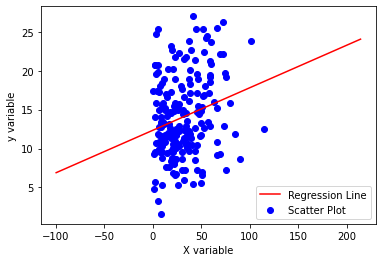

In [175]:
max_x= np.max(X)+100
min_x= np.min(X)-100

x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

plt.plot(x,y,color='r',label='Regression Line')
plt.scatter(X,Y,c='b',label='Scatter Plot')

plt.xlabel('X variable')
plt.ylabel('y variable')
plt.legend()
plt.show()

In [176]:
################################################################################################################

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error